In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Fetching Data from Airtable

In [13]:
cookies = {
    'brw': 'brwcY1i8Kjrh8zl1I',
    '__Host-airtable-session': 'eyJzZXNzaW9uSWQiOiJzZXNpS3ZQT3NVMWZUOUJNcyIsImNzcmZTZWNyZXQiOiJmMmMxZUZpd2dGNG84VzhkcW1JclZNbWUifQ==',
    '__Host-airtable-session.sig': 'kYqH1ocxMuSwXPOH8b9-llPiWaHtpClJPkND-fO_PjI',
    'OptanonConsent': 'isGpcEnabled=0&datestamp=Sun+Feb+04+2024+10%3A13%3A47+GMT%2B0530+(India+Standard+Time)&version=202308.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=bf7354d2-943c-4934-8312-975641f1ff53&interactionCount=1&landingPath=https%3A%2F%2Fairtable.com%2Fapp1PaujS9zxVGUZ4%2FshrqYt5kSqMzHV9R5%2Ftbl8c8kanuNB6bPYr%3FbackgroundColor%3Dgreen%26viewControls%3Don&groups=C0001%3A1%2CC0002%3A1%2CC0007%3A1%2CC0003%3A1%2CC0004%3A1',
    'mv': 'eyJzdGFydFRpbWUiOiIyMDI0LTAyLTA0VDA0OjQwOjQ3LjI2OFoiLCJsb2NhdGlvbiI6Imh0dHBzOi8vYWlydGFibGUuY29tL2FwcDFQYXVqUzl6eFZHVVo0LyoqKioqKioqKioqKioqKioqL3RibDhjOGthbnVOQjZiUFlyP2JhY2tncm91bmRDb2xvcj0qJnZpZXdDb250cm9scz0qIiwiaW50ZXJuYWxUcmFjZUlkIjoidHJjZXJCUFByVXBTNzl1N0kifQ==',
    'AWSALB': 'NwzRtggM4BX3WDzmZVn3fm/WoRdhgG1IBvVRQHUbnsj5oZt2NFsO6zGDfnAe2Lx2vKrAzfTc2i86c3G6pi3eRIPTd1OZ03HmjHHj4QT+hBBs7nCjeMaaEGO4VjCu',
    'AWSALBCORS': 'NwzRtggM4BX3WDzmZVn3fm/WoRdhgG1IBvVRQHUbnsj5oZt2NFsO6zGDfnAe2Lx2vKrAzfTc2i86c3G6pi3eRIPTd1OZ03HmjHHj4QT+hBBs7nCjeMaaEGO4VjCu',
}

headers = {
    'authority': 'airtable.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    # 'cookie': 'brw=brwcY1i8Kjrh8zl1I; __Host-airtable-session=eyJzZXNzaW9uSWQiOiJzZXNpS3ZQT3NVMWZUOUJNcyIsImNzcmZTZWNyZXQiOiJmMmMxZUZpd2dGNG84VzhkcW1JclZNbWUifQ==; __Host-airtable-session.sig=kYqH1ocxMuSwXPOH8b9-llPiWaHtpClJPkND-fO_PjI; OptanonConsent=isGpcEnabled=0&datestamp=Sun+Feb+04+2024+10%3A13%3A47+GMT%2B0530+(India+Standard+Time)&version=202308.2.0&browserGpcFlag=0&isIABGlobal=false&hosts=&consentId=bf7354d2-943c-4934-8312-975641f1ff53&interactionCount=1&landingPath=https%3A%2F%2Fairtable.com%2Fapp1PaujS9zxVGUZ4%2FshrqYt5kSqMzHV9R5%2Ftbl8c8kanuNB6bPYr%3FbackgroundColor%3Dgreen%26viewControls%3Don&groups=C0001%3A1%2CC0002%3A1%2CC0007%3A1%2CC0003%3A1%2CC0004%3A1; mv=eyJzdGFydFRpbWUiOiIyMDI0LTAyLTA0VDA0OjQwOjQ3LjI2OFoiLCJsb2NhdGlvbiI6Imh0dHBzOi8vYWlydGFibGUuY29tL2FwcDFQYXVqUzl6eFZHVVo0LyoqKioqKioqKioqKioqKioqL3RibDhjOGthbnVOQjZiUFlyP2JhY2tncm91bmRDb2xvcj0qJnZpZXdDb250cm9scz0qIiwiaW50ZXJuYWxUcmFjZUlkIjoidHJjZXJCUFByVXBTNzl1N0kifQ==; AWSALB=NwzRtggM4BX3WDzmZVn3fm/WoRdhgG1IBvVRQHUbnsj5oZt2NFsO6zGDfnAe2Lx2vKrAzfTc2i86c3G6pi3eRIPTd1OZ03HmjHHj4QT+hBBs7nCjeMaaEGO4VjCu; AWSALBCORS=NwzRtggM4BX3WDzmZVn3fm/WoRdhgG1IBvVRQHUbnsj5oZt2NFsO6zGDfnAe2Lx2vKrAzfTc2i86c3G6pi3eRIPTd1OZ03HmjHHj4QT+hBBs7nCjeMaaEGO4VjCu',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'x-airtable-accept-msgpack': 'true',
    'x-airtable-application-id': 'app1PaujS9zxVGUZ4',
    'x-airtable-inter-service-client': 'webClient',
    'x-airtable-page-load-id': 'pglRceO8157v9Pm87',
    'x-early-prefetch': 'true',
    'x-requested-with': 'XMLHttpRequest',
    'x-time-zone': 'Asia/Calcutta',
    'x-user-locale': 'en',
}


response = requests.get(
    'https://airtable.com/v0.3/view/viwA14Z1pM69YIsaW/readSharedViewData?stringifiedObjectParams=%7B%22shouldUseNestedResponseFormat%22%3Atrue%7D&requestId=req9alngyvTFGIg03&accessPolicy=%7B%22allowedActions%22%3A%5B%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSharedViewData%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22getMetadataForPrinting%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSignedAttachmentUrls%22%7D%2C%7B%22modelClassName%22%3A%22row%22%2C%22modelIdSelector%22%3A%22rows%20*%5BdisplayedInView%3DviwA14Z1pM69YIsaW%5D%22%2C%22action%22%3A%22createDocumentPreviewSession%22%7D%5D%2C%22shareId%22%3A%22shrqYt5kSqMzHV9R5%22%2C%22applicationId%22%3A%22app1PaujS9zxVGUZ4%22%2C%22generationNumber%22%3A0%2C%22expires%22%3A%222024-02-29T00%3A00%3A00.000Z%22%2C%22signature%22%3A%22abb23ebde8b86f2ba3c09d0dba82702f2084688e43dfe1fdfbdaf583eadaca3a%22%7D',
    cookies=cookies,
    headers=headers,
)

In [14]:
jsonData = response.json()

In [15]:
table = jsonData.get("data","").get("table")

In [16]:
columns = table.get("columns","")

In [17]:
mappingDict = dict()
for column in columns:
    id = column["id"]
    name = column["name"]
    mappingDict[id] = name
    if "typeOptions" in column:
        try:
            typeOptions = column.get("typeOptions")
            choices = typeOptions.get("choices")
            for key,value in choices.items():
                mappingDict[value["id"]] = value["name"]
        except:
            pass

In [18]:
rows= table.get("rows","")

Analysing Data Available in json response and identifying values of it like country from countrycode etc

In [19]:
dataLst =[]
for row in rows:
    cellValuesByColumnId = row["cellValuesByColumnId"]
    interdict = dict()
    for d,k in cellValuesByColumnId.items():
        interdict[mappingDict[d]] = k
    dataLst.append(interdict)

Creating DataFrame

In [20]:
df = pd.DataFrame(dataLst)

In [21]:
df.head()

,Company,Location HQ,Industry,# Laid Off,%,Date,Source,$ Raised (mm),Stage,Date Added,Country,List of Employees Laid Off
0,Top Hat,"[selh1UXiAoacwyW34, sel8GpsCiYX4oM0Yl]",sel6OGZcQaNaIy01j,35.0,0.07,2024-02-02T00:00:00.000Z,https://betakit.com/toronto-software-companies...,234.0,selYrHZ7XxiUWzx3q,2024-02-02T16:32:39.000Z,selM7Gdl5vwqTgibq,NaN
1,Cake Bikes,"[selVccWCxrqKzJW5Q, sel8GpsCiYX4oM0Yl]",selBvC3A4HNUDzerT,NaN,1.00,2024-02-02T00:00:00.000Z,https://techcrunch.com/2024/02/02/cake-electri...,74.0,selRkNOUKADWhjDVg,2024-02-03T01:52:50.000Z,sel0zGKcHEPYFyjj5,NaN
2,Small Robot Company,"[selL8F3rI6LGYdSLL, sel8GpsCiYX4oM0Yl]",sel0UCZcPOcDjGani,NaN,1.00,2024-02-02T00:00:00.000Z,https://www.therobotreport.com/agtech-startup-...,10.0,selRkNOUKADWhjDVg,2024-02-03T01:53:48.000Z,sel5OzJCT8kst6x2A,NaN
3,Twig,"[selnBHRWdTxvcfNCY, sel8GpsCiYX4oM0Yl]",seluHafT4M09jrLuo,NaN,1.00,2024-02-02T00:00:00.000Z,https://www.fintechfutures.com/2024/02/uk-fint...,41.0,selRkNOUKADWhjDVg,2024-02-03T01:55:38.000Z,sel5OzJCT8kst6x2A,NaN
4,Okta,[selKhBn9WkXIaFjXW],selOiyle68RTVF1rX,400.0,0.07,2024-02-01T00:00:00.000Z,https://www.cnbc.com/2024/02/01/okta-to-lay-of...,1200.0,sela5OuwQcXOkl5WO,2024-02-01T17:03:13.000Z,seldVNXmT64IJdbP2,NaN


In [22]:
def identifyValues(text):
    try:
        if isinstance(text,list):
            return list(map(lambda x:mappingDict[x],text))
        else:
            return mappingDict[text]
    except:
        return ''

In [23]:
df.columns

Index(['Company', 'Location HQ', 'Industry', '# Laid Off', '%', 'Date',
       'Source', '$ Raised (mm)', 'Stage', 'Date Added', 'Country',
       'List of Employees Laid Off'],
      dtype='object')

In [24]:
df.shape  #Number of Layoffs happened till today

(3412, 12)

In [25]:
df["Industry"] = df["Industry"].apply(identifyValues)

In [26]:
df["Stage"] = df["Stage"].apply(identifyValues)

In [27]:
df["Country"] = df["Country"].apply(identifyValues)

In [28]:
df["Location HQ"] = df["Location HQ"].apply(identifyValues)

In [29]:
df.head()

,Company,Location HQ,Industry,# Laid Off,%,Date,Source,$ Raised (mm),Stage,Date Added,Country,List of Employees Laid Off
0,Top Hat,"[Toronto, Non-U.S.]",Education,35.0,0.07,2024-02-02T00:00:00.000Z,https://betakit.com/toronto-software-companies...,234.0,Series E,2024-02-02T16:32:39.000Z,Canada,NaN
1,Cake Bikes,"[Stockholm, Non-U.S.]",Transportation,NaN,1.00,2024-02-02T00:00:00.000Z,https://techcrunch.com/2024/02/02/cake-electri...,74.0,Unknown,2024-02-03T01:52:50.000Z,Sweden,NaN
2,Small Robot Company,"[Salisbury, Non-U.S.]",Food,NaN,1.00,2024-02-02T00:00:00.000Z,https://www.therobotreport.com/agtech-startup-...,10.0,Unknown,2024-02-03T01:53:48.000Z,United Kingdom,NaN
3,Twig,"[London, Non-U.S.]",Finance,NaN,1.00,2024-02-02T00:00:00.000Z,https://www.fintechfutures.com/2024/02/uk-fint...,41.0,Unknown,2024-02-03T01:55:38.000Z,United Kingdom,NaN
4,Okta,[SF Bay Area],Security,400.0,0.07,2024-02-01T00:00:00.000Z,https://www.cnbc.com/2024/02/01/okta-to-lay-of...,1200.0,Post-IPO,2024-02-01T17:03:13.000Z,United States,NaN


Layoffs W.r.t Funding Stages

<Axes: xlabel='Stage'>

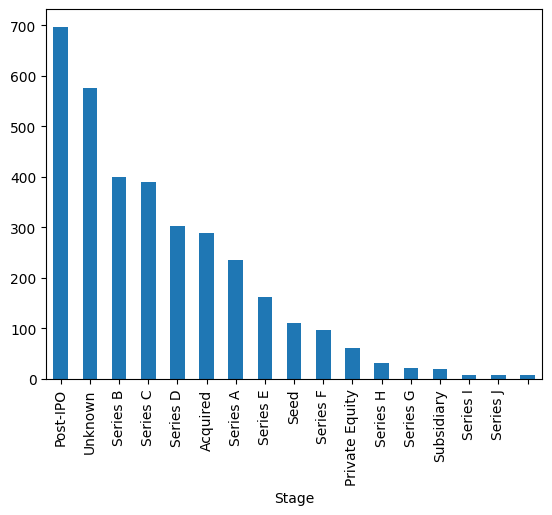

In [30]:
df["Stage"].value_counts().plot(kind="bar") 

In [31]:
def get_year(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.year
    except:
        return 0

In [32]:
df["Year"] = df["Date"].apply(get_year)

In [33]:
def get_month(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.month
    except:
        return 0

In [34]:
df["Month"] = df["Date"].apply(get_year)

Number of Layoffs Rounds Each year

<Axes: xlabel='Year'>

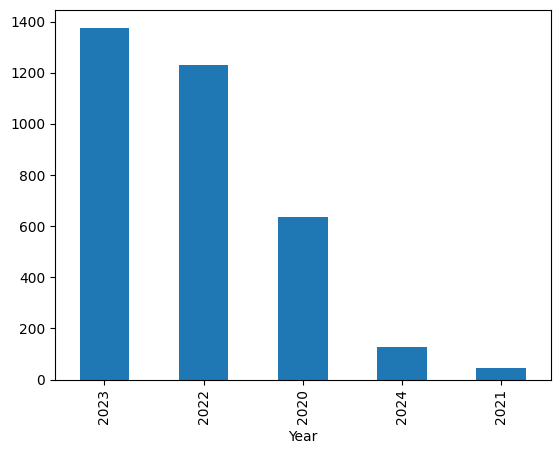

In [35]:
df["Year"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

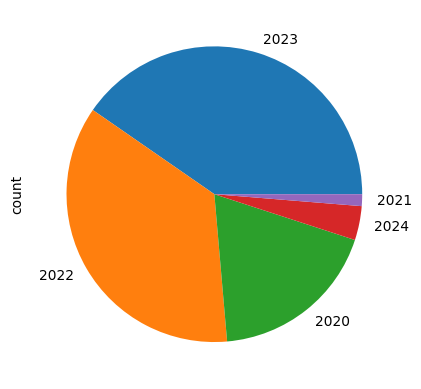

In [36]:
df["Year"].value_counts().plot(kind="pie")

Number of Peoples laid off each year

<Axes: xlabel='Year'>

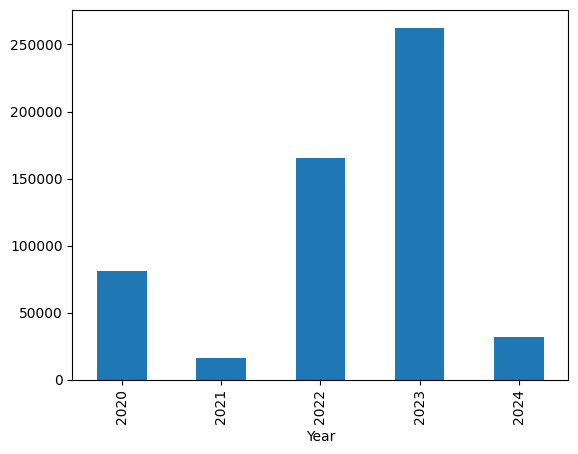

In [37]:
df.groupby(["Year"])["# Laid Off"].sum().plot(kind="bar")

Analysing Number of Layoffs Rounds W.R.T. Industry

<Axes: xlabel='Industry'>

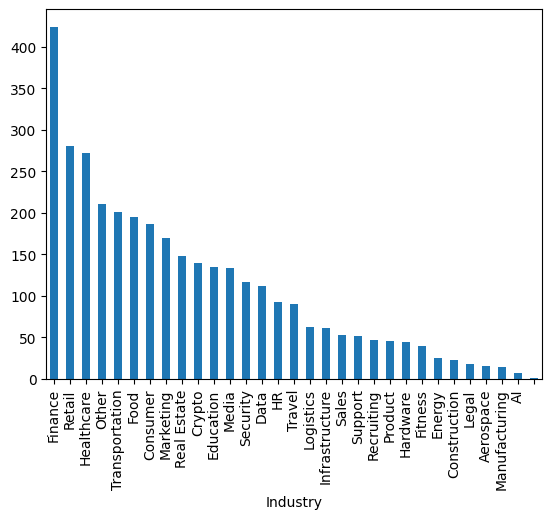

In [38]:
df["Industry"].value_counts().plot(kind="bar")

Number of Peoples Laid off Industry wise

<Axes: xlabel='Industry'>

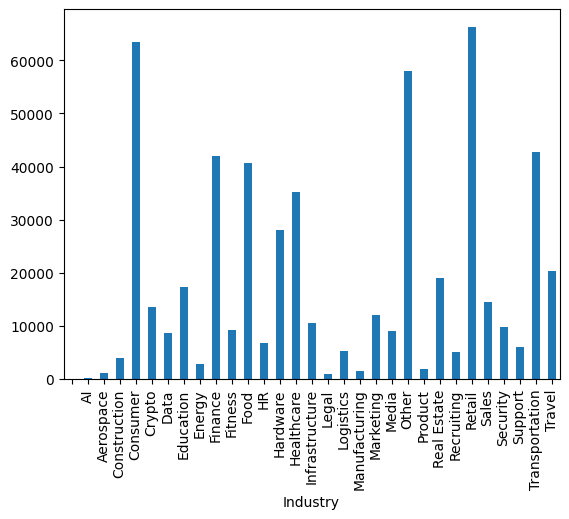

In [39]:
df.groupby(["Industry"])["# Laid Off"].sum().plot(kind="bar")

Number of Layoffs Rounds Country wise

<Axes: xlabel='Country'>

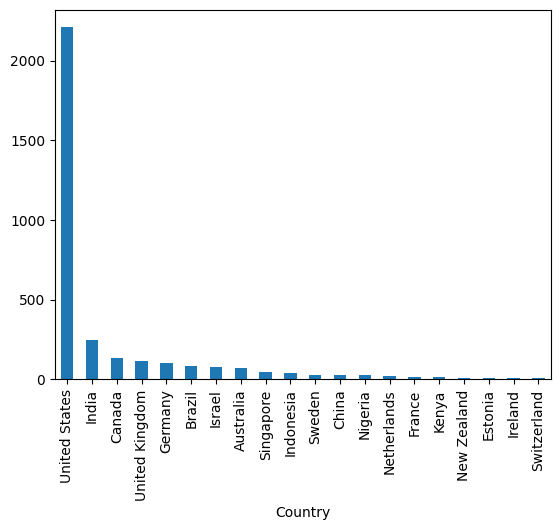

In [40]:
df["Country"].value_counts()[:20].plot(kind="bar")

<Axes: xlabel='Country'>

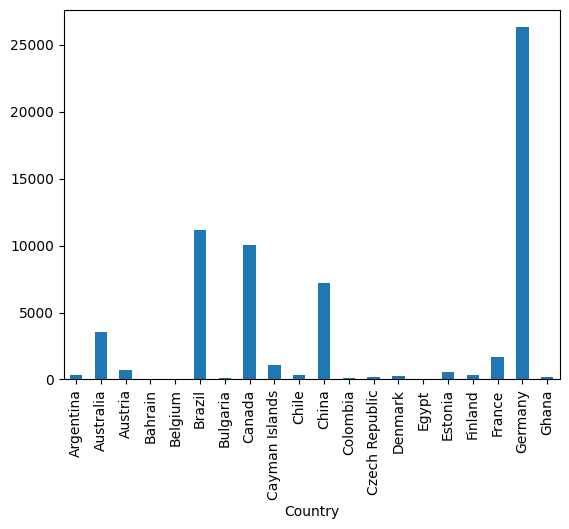

In [41]:
df.groupby(["Country"])["# Laid Off"].sum()[:20].plot(kind="bar")